In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# As data in dataset are vey less so i replace some '0' datapoint  to mean of respective column

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.groupby('Outcome')['Outcome'].agg('count')

Outcome
0    500
1    268
Name: Outcome, dtype: int64

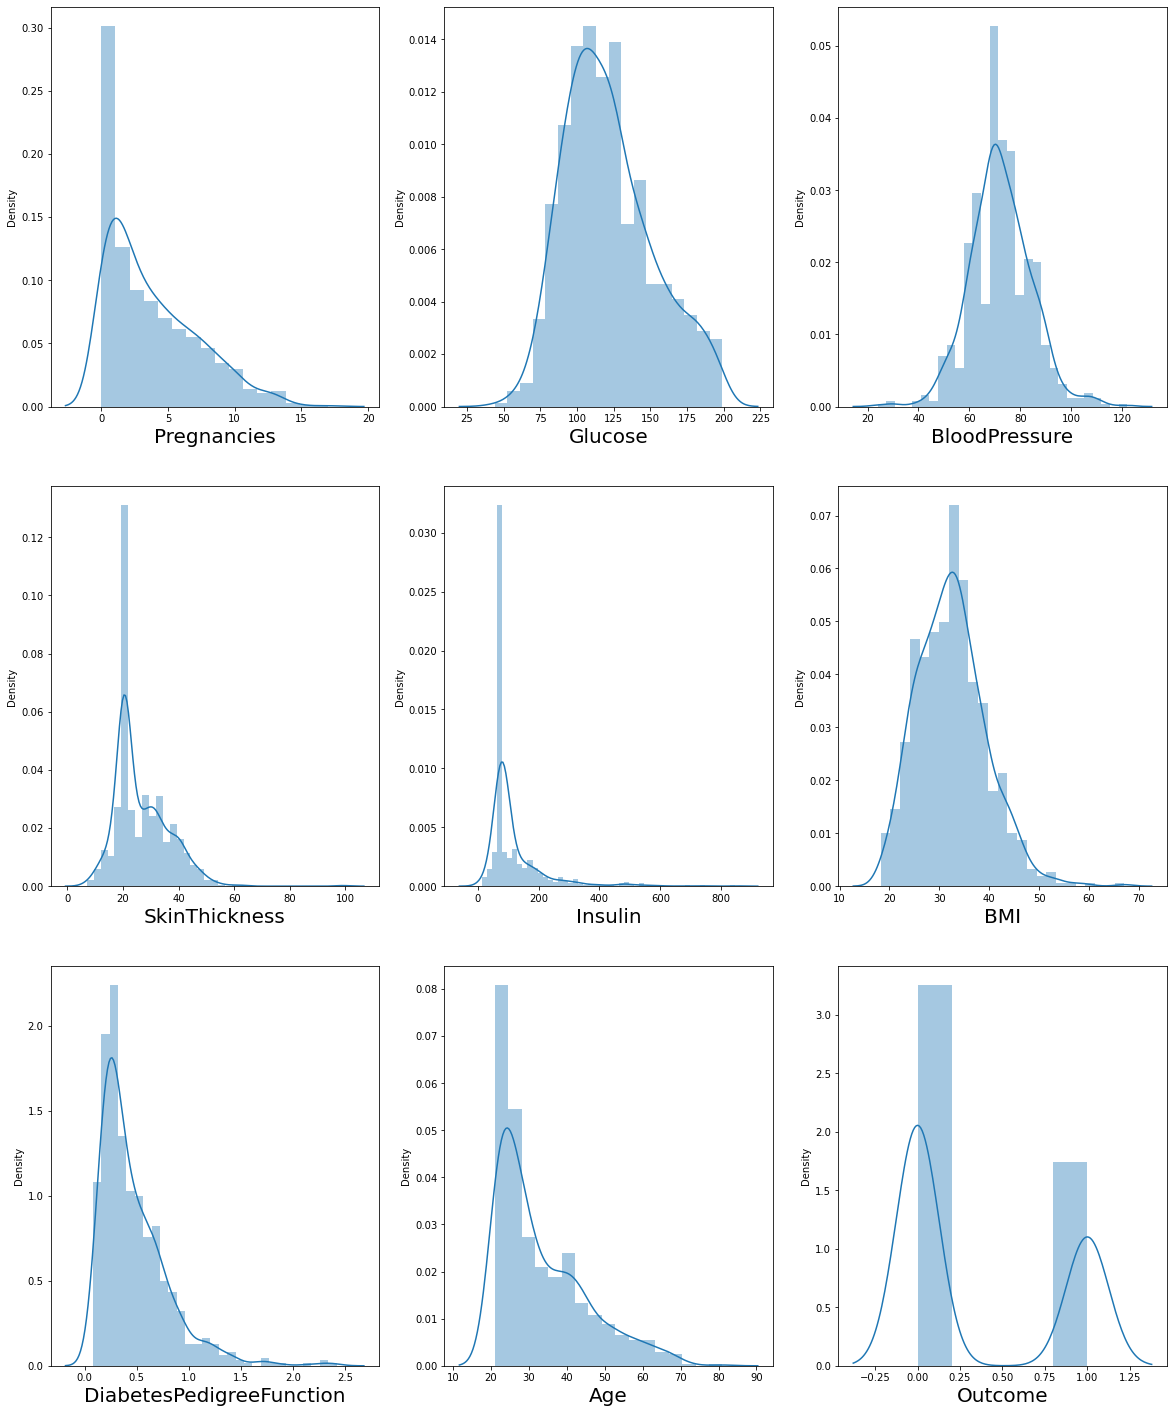

In [7]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

<AxesSubplot:>

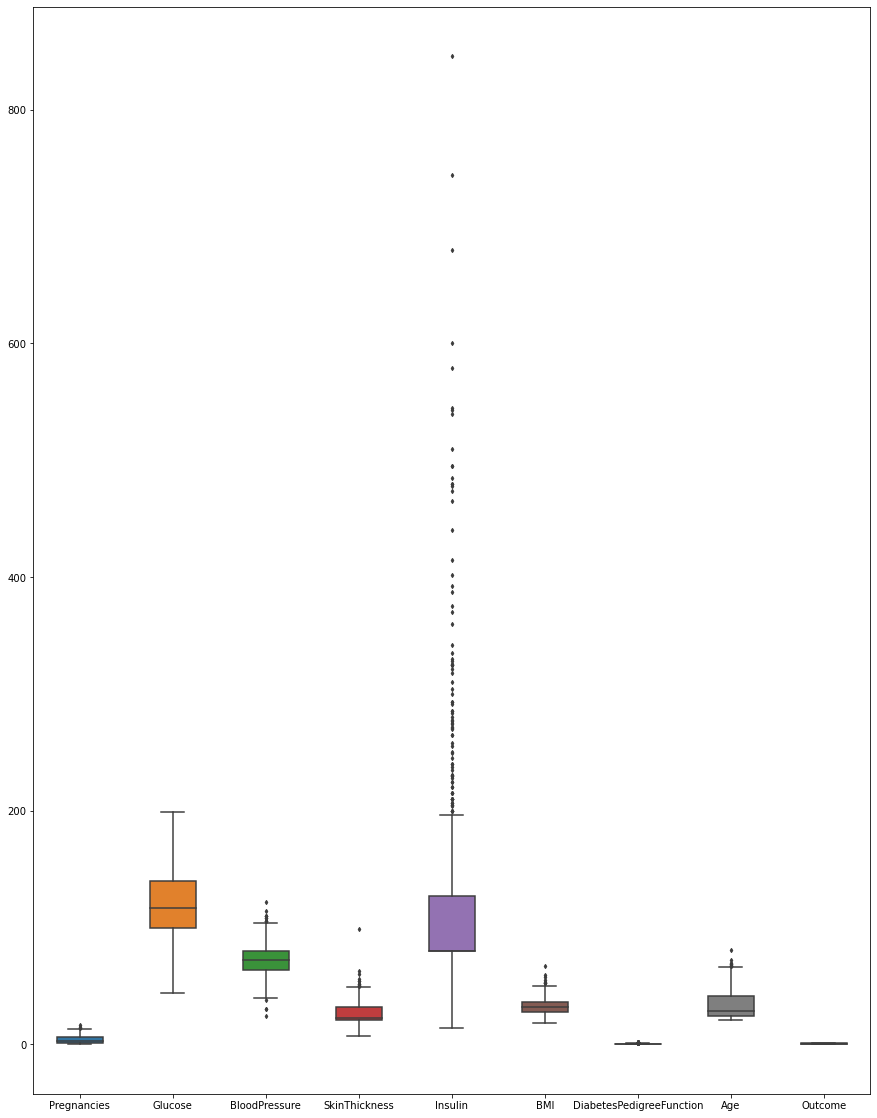

In [8]:
fig,ax=plt.subplots(figsize=(15,20))
sns.boxplot(data=df,width=0.5,fliersize=3)

# Removing Outlier

In [9]:
# Removing Pregnancies Outlier 

p_max_thresold=df.Pregnancies.quantile(0.99)
p_max_thresold

13.0

In [10]:
df['Pregnancies']=df[(df.Pregnancies<=p_max_thresold)]

In [11]:
df.Pregnancies.describe()

count    764.000000
mean       3.786649
std        3.278714
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: Pregnancies, dtype: float64

In [12]:
# Removing Glucose Outlier


Q1=df.Glucose.quantile(0.25)
Q3=df.Glucose.quantile(0.75)
IQR=Q3-Q1
IQR

40.5

In [13]:
bp_lower_limit=Q1-1*IQR
bp_upper_limit=Q3+2.5*IQR
bp_lower_limit, bp_upper_limit

(59.25, 241.5)

In [14]:
bp_outlier=df[(df.Glucose>bp_lower_limit) & (df.Glucose<=bp_upper_limit)]

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

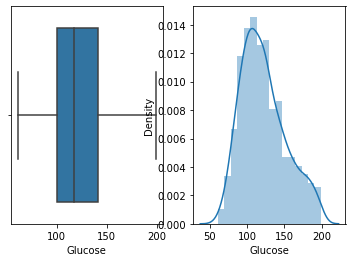

In [15]:
fig,axis=plt.subplots(1,2)

sns.boxplot(bp_outlier.Glucose, ax=axis[0])
sns.distplot(bp_outlier.Glucose, ax=axis[1])

In [16]:
df['Glucose']=bp_outlier['Glucose']

In [17]:
df.Glucose.describe()

count    764.000000
mean     122.038577
std       30.108976
min       61.000000
25%      100.000000
50%      117.500000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

In [18]:
df.shape

(768, 9)

In [19]:
# Removing SkinThickness Outlier:

Q1=df.SkinThickness.quantile(0.25)
Q3=df.SkinThickness.quantile(0.75)
IQR=Q3-Q1
IQR

11.463541666666668

In [20]:
s_lower_limit=Q1-1.7*IQR
s_upper_limit=Q3+1.5*IQR
s_lower_limit,s_upper_limit

(1.0484374999999986, 49.1953125)

In [21]:
s_outlier=df[(df.SkinThickness>=s_lower_limit) & (df.SkinThickness< s_upper_limit)]

In [22]:
df['SkinThickness']=s_outlier['SkinThickness']

<AxesSubplot:xlabel='SkinThickness'>

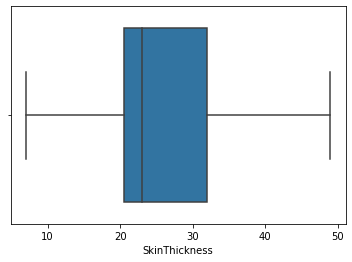

In [23]:
sns.boxplot(df.SkinThickness)

In [24]:
df.isnull().sum()

Pregnancies                  4
Glucose                      4
BloodPressure                0
SkinThickness               12
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [25]:
df['Pregnancies'].fillna(int(df['Pregnancies'].mean()),inplace=True)
df['Glucose'].fillna(int(df['Glucose'].mean()),inplace=True)
df['SkinThickness'].fillna(int(df['SkinThickness'].mean()),inplace=True)

In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Insulin'>

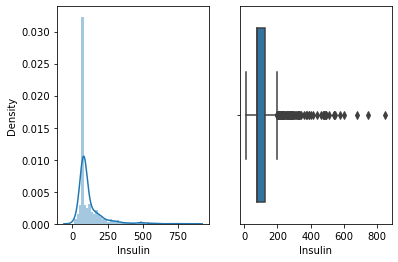

In [27]:
fig,axis=plt.subplots(1,2)
sns.distplot(df.Insulin, ax=axis[0])
sns.boxplot(df.Insulin, ax=axis[1])

In [28]:
i_upper_limit=df['Insulin'].mean()+ 1.5*df.Insulin.std()

In [29]:
i_upper_limit

258.28069950916506

In [30]:
I_outlier=df[df.Insulin<i_upper_limit]

<AxesSubplot:xlabel='Insulin'>

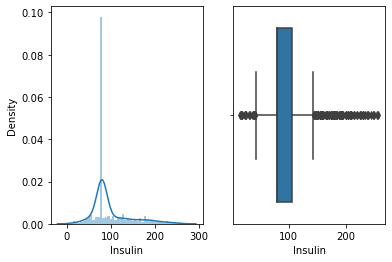

In [31]:
fig,axis=plt.subplots(1,2)
sns.distplot(I_outlier.Insulin, ax=axis[0])
sns.boxplot(I_outlier.Insulin, ax=axis[1])

In [32]:
def I_outlier(row):
    if row['Insulin'] >=20 and row['Insulin'] <=160:
        return "Normal"
    else:
        return "Abnormal"

In [33]:
df['Insulin_Params']=df.apply(I_outlier,axis=1)

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Params
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,Normal
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,Normal
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,Normal
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Abnormal


In [35]:
df1=df.copy()

In [36]:
def BMI_out(row):
    if row['BMI'] <18.5:
        return "UnderWeight"
    elif row['BMI'] > 18.5 and row['BMI']<=24.9:
        return "Normal"
    elif row['BMI'] >24.9 and row['BMI']<=29.9:
        return "OverWeight"
    else:
        return "Obes"

In [37]:
df1['BMI_Params']=df1.apply(BMI_out,axis=1)

In [38]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Params,BMI_Params
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,Normal,Obes
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,Normal,OverWeight
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,Normal,Normal
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal,OverWeight
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Abnormal,Obes


# One Hot Encoding

In [39]:
df2=pd.get_dummies(df1,columns=['Insulin_Params','BMI_Params'])
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Params_Abnormal,Insulin_Params_Normal,BMI_Params_Normal,BMI_Params_Obes,BMI_Params_OverWeight,BMI_Params_UnderWeight
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,0,1,0,1,0,0
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,0,1,0,0,1,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,0,1,1,0,0,0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,0,1,0,0,1,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,1,0,0,1,0,0


In [40]:
df2.drop(['Insulin','BMI','Insulin_Params_Abnormal','BMI_Params_Obes'],axis=1,inplace=True)

In [41]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,Insulin_Params_Normal,BMI_Params_Normal,BMI_Params_OverWeight,BMI_Params_UnderWeight
0,6.0,148.0,72.0,35.000000,0.627,50,1,1,0,0,0
1,1.0,85.0,66.0,29.000000,0.351,31,0,1,0,1,0
2,8.0,183.0,64.0,20.536458,0.672,32,1,1,1,0,0
3,1.0,89.0,66.0,23.000000,0.167,21,0,1,0,1,0
4,0.0,137.0,40.0,35.000000,2.288,33,1,0,0,0,0


# Model Building

In [42]:
X=df2.drop('Outcome',axis=1)
y=df2.Outcome

In [43]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Insulin_Params_Normal,BMI_Params_Normal,BMI_Params_OverWeight,BMI_Params_UnderWeight
0,6.0,148.0,72.0,35.000000,0.627,50,1,0,0,0
1,1.0,85.0,66.0,29.000000,0.351,31,1,0,1,0
2,8.0,183.0,64.0,20.536458,0.672,32,1,1,0,0
3,1.0,89.0,66.0,23.000000,0.167,21,1,0,1,0
4,0.0,137.0,40.0,35.000000,2.288,33,0,0,0,0


In [44]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=101)

In [46]:
scaled=StandardScaler()

In [47]:
X2_train=scaled.fit_transform(X_train)
X2_test=scaled.fit_transform(X_test)
y2_train=y_train
y2_test=y_test

# LOGISTIC REGRESSION

In [48]:
lg_model1=LogisticRegression()
lg_model1.fit(X_train,y_train)

LogisticRegression()

In [84]:
lg_model1.score(X_test,y_test)

0.7272727272727273

In [85]:
y1_pred=lg_model1.predict(X_test)
print(confusion_matrix(y_test,y1_pred))
print(classification_report(y_test,y1_pred))

[[85 18]
 [24 27]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       103
           1       0.60      0.53      0.56        51

    accuracy                           0.73       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



In [50]:
lg_model2=LogisticRegression()
lg_model2.fit(X2_train,y2_train)

LogisticRegression()

In [51]:
lg_model2.score(X2_test,y2_test)

0.7597402597402597

In [52]:
y_pred=lg_model2.predict(X2_test)

In [53]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [54]:
print(confusion_matrix(y2_test,y_pred))

[[86 17]
 [20 31]]


In [55]:
print(classification_report(y2_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       103
           1       0.65      0.61      0.63        51

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154



# DicisionTree Classifier

In [143]:
DT_model1=DecisionTreeClassifier()

In [159]:
DT_model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [160]:
DT_model1.score(X_test,y_test)

0.7597402597402597

In [196]:
y1_pred=DT_model1.predict(X_test)

In [201]:
print(confusion_matrix(y_test,y1_pred))
print(classification_report(y_test,y1_pred))

[[81 22]
 [15 36]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       103
           1       0.62      0.71      0.66        51

    accuracy                           0.76       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



In [203]:
DT_model2=DecisionTreeClassifier()

In [161]:
DT_model2.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [190]:
DT_model2.score(X2_test,y2_test)

0.7402597402597403

In [193]:
y2_pred=DT_model2.predict(X2_test)

In [204]:
print(confusion_matrix(y2_test,y2_pred))
print(classification_report(y2_test,y2_pred))

[[81 22]
 [18 33]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       103
           1       0.60      0.65      0.62        51

    accuracy                           0.74       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.75      0.74      0.74       154



## DecisionTree Model Parameter Tuning

In [82]:
DT_param={
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,25,3),
    'min_samples_leaf' : range(2,20,2),
    'min_samples_split': range(2,20,2),
    'splitter' : ['best', 'random']
}

In [83]:
DT_model3=DecisionTreeClassifier()
DT_GSCV=GridSearchCV(estimator=DT_model3,param_grid=DT_param,n_jobs=-1,cv=5,verbose=2)

In [87]:
DT_GSCV.fit(X2_train,y2_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3896 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 10392 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 12960 out of 12960 | elapsed:   23.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 25, 3),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']},
             verbose=2)

In [90]:
DT_params=DT_GSCV.best_params_

In [91]:
DT_params

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 12,
 'min_samples_split': 18,
 'splitter': 'random'}

In [93]:
DT_model3=DecisionTreeClassifier( criterion='gini',
                                 max_depth=5,
                                 min_samples_leaf=12,
                                 min_samples_split=18,
                                splitter='random')

In [163]:
DT_model3.fit(X2_train,y2_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=12, min_samples_split=18,
                       splitter='random')

In [164]:
DT_model3.score(X2_test,y2_test)

0.7922077922077922

In [206]:
y_pred3=DT_model3.predict(X2_test)

In [208]:
print(confusion_matrix(y2_test,y_pred3))
print(classification_report(y2_test,y_pred3))

[[91 12]
 [20 31]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       103
           1       0.72      0.61      0.66        51

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [104]:
DT_model3.predict_proba(X2_test[:10])

array([[0.45925926, 0.54074074],
       [0.33333333, 0.66666667],
       [0.98214286, 0.01785714],
       [0.45925926, 0.54074074],
       [0.77380952, 0.22619048],
       [0.04347826, 0.95652174],
       [0.04347826, 0.95652174],
       [0.77380952, 0.22619048],
       [0.45925926, 0.54074074],
       [0.75      , 0.25      ]])

# Naive Bayes Classifier

In [107]:
nb_model1=GaussianNB()

In [165]:
nb_model1.fit(X_train,y_train)

GaussianNB()

In [166]:
nb_model1.score(X_test,y_test)

0.44155844155844154

In [209]:
y_pred1=nb_model1.predict(X_test)

In [210]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20 83]
 [ 3 48]]
              precision    recall  f1-score   support

           0       0.87      0.19      0.32       103
           1       0.37      0.94      0.53        51

    accuracy                           0.44       154
   macro avg       0.62      0.57      0.42       154
weighted avg       0.70      0.44      0.39       154



In [167]:
nb_model2=GaussianNB()
nb_model2.fit(X2_train,y2_train)

GaussianNB()

In [211]:
nb_model2.score(X2_test,y2_test)

0.6688311688311688

In [214]:
y_pred2=nb_model2.predict(X2_test)

In [215]:
print(confusion_matrix(y2_test,y_pred2))
print(classification_report(y2_test,y_pred2))

[[103   0]
 [ 51   0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       103
           1       0.00      0.00      0.00        51

    accuracy                           0.67       154
   macro avg       0.33      0.50      0.40       154
weighted avg       0.45      0.67      0.54       154



# XGB Classsifier

In [169]:
XGB_model1=XGBClassifier()
XGB_model1.fit(X_train,y_train)

[23:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
XGB_model1.score(X_test,y_test)

0.7467532467532467

In [217]:
xgb_pred1=XGB_model1.predict(X_test)

In [219]:
print(confusion_matrix(y_test,xgb_pred1))
print(classification_report(y_test,xgb_pred1))

[[85 18]
 [21 30]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       103
           1       0.62      0.59      0.61        51

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



In [171]:
XGB_model2=XGBClassifier()
XGB_model2.fit(X2_train,y2_train)

[23:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
XGB_model2.score(X2_test,y2_test)

0.7272727272727273

In [221]:
xgb_pred2=XGB_model2.predict(X2_test)
print(confusion_matrix(y_test,xgb_pred2))
print(classification_report(y2_test,xgb_pred2))

[[80 23]
 [19 32]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       103
           1       0.58      0.63      0.60        51

    accuracy                           0.73       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



## XGB Model Parameter Tuning

In [122]:
xgb_params={
    "learning_rate": [0.5,0.10,0.15,0.20,0.25],
    "max_depth": range(2,25,3),
    "min_child_weight": range(2,25,3),
    "gamma": [0.0,0.1,0.2,0.3,0.5],
    "colsample_bytree":[0.3,0.4,0.5,0.7,0.9]
}

In [126]:
XGB_model3=XGBClassifier()
XGB_GSCV=GridSearchCV(estimator=XGB_model3,param_grid=xgb_params,cv=5,n_jobs=-1,verbose=2)

In [127]:
XGB_GSCV.fit(X_train,y_train)

Fitting 5 folds for each of 8000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

[23:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [128]:
xgb_param=XGB_GSCV.best_params_

In [129]:
xgb_param

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.15,
 'max_depth': 11,
 'min_child_weight': 2}

In [130]:
XGB_model3=XGBClassifier(colsample_bytree= 0.5,
                         gamma= 0.1,
                         learning_rate= 0.15,
                         max_depth= 11,
                         min_child_weight= 2)

In [131]:
XGB_model3.fit(X_train,y_train)

[23:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=11,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
XGB_model3.score(X_test,y_test)

0.7467532467532467

In [222]:
xgb_pred3=XGB_model3.predict(X_test)
print(confusion_matrix(y_test,xgb_pred3))
print(classification_report(y_test,xgb_pred3))

[[85 18]
 [21 30]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       103
           1       0.62      0.59      0.61        51

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



# KNN MODEL

In [49]:
KNN_model1=KNeighborsClassifier()

In [50]:
KNN_model1.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
KNN_model1.score(X_test,y_test)

0.6948051948051948

In [58]:
KNN_pred1=KNN_model1.predict(X_test)
print(confusion_matrix(y_test,KNN_pred1))
print(classification_report(y_test,KNN_pred1))

[[81 22]
 [25 26]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       103
           1       0.54      0.51      0.53        51

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [60]:
KNN_model2=KNeighborsClassifier()
KNN_model2.fit(X2_train,y2_train)

KNeighborsClassifier()

In [61]:
KNN_model2.score(X2_test,y2_test)

0.7597402597402597

In [62]:
KNN_pred2=KNN_model2.predict(X2_test)
print(confusion_matrix(y2_test,KNN_pred1))
print(classification_report(y2_test,KNN_pred2))

[[81 22]
 [25 26]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       103
           1       0.65      0.61      0.63        51

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154



# Random Forest

In [56]:
RF_model1=RandomForestClassifier()

In [57]:
RF_model1.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
RF_pred1=RF_model1.predict(X_test)
print(confusion_matrix(y_test,RF_pred1))
print(classification_report(y_test,RF_pred1))

[[86 17]
 [20 31]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       103
           1       0.65      0.61      0.63        51

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154



In [59]:
RF_model2=RandomForestClassifier()

In [60]:
RF_model2.fit(X2_train,y_train)

RandomForestClassifier()

In [61]:
RF_pred2=RF_model2.predict(X2_test)
print(confusion_matrix(y2_test,RF_pred2))
print(classification_report(y2_test,RF_pred2))

[[85 18]
 [17 34]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.65      0.67      0.66        51

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.77      0.77       154



In [62]:
n_estimators=[int(x) for x in np.linspace(start=10, stop=100,num=10)]
max_depth=[int(x) for x in np.linspace(10,100,10)]
min_samples_split=[2,4,6,8,10,12]
min_samples_leaf=[1,2,3,4,6,8,10]
max_features=('auto','sqrt','log2')

RF_param={
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'criterion':['gini','entropy']
}
RF_param

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 4, 6, 8, 10, 12],
 'min_samples_leaf': [1, 2, 3, 4, 6, 8, 10],
 'max_features': ('auto', 'sqrt', 'log2'),
 'criterion': ['gini', 'entropy']}

In [63]:
RF_model3=RandomForestClassifier()
RF_GSCV=GridSearchCV(estimator=RF_model3,param_grid=RF_param,n_jobs=-1,cv=5,verbose=2)

In [64]:
RF_GSCV.fit(X_train,y_train)

Fitting 5 folds for each of 25200 candidates, totalling 126000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_leaf': [1, 2, 3, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [65]:
RF_GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 12,
 'n_estimators': 40}

In [66]:
RF_model3=RandomForestClassifier(criterion= 'gini',
                                max_depth= 40,
                                max_features= 'log2',
                                min_samples_leaf= 6,
                                min_samples_split= 12,
                                n_estimators= 40)

In [76]:
RF_model3.fit(X_train,y_train)

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=6,
                       min_samples_split=12, n_estimators=40)

In [77]:
RF_pred=RF_model3.predict(X_test)

In [80]:
print(confusion_matrix(y_test,RF_pred))
print(classification_report(y_test,RF_pred))

[[87 16]
 [18 33]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       103
           1       0.67      0.65      0.66        51

    accuracy                           0.78       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154

